## Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [2]:
from sklearn.tree import (DecisionTreeClassifier as DTC, #for classification problems
                          DecisionTreeRegressor as DTR, #for regression problems
                          plot_tree, #for visualization the decision tree
                          export_text) #for visualization in text
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF, # for random forest model
      GradientBoostingRegressor as GBR) # for boosting model
import statsmodels.api as sm # linear regression model


## Loading the Audiobooks dataset

In [3]:
dataset = pd.read_csv("C:/umkc/courses/isl/labs/Audiobooks_data.csv", header=0, na_values='NA')

we have imported the Audiobooks dataset and also assigned 'NA' if there are any null values.

In [4]:
dataset.head()

,ID,Book length (mins)_overall,Book Length (mins)_avg,Price_overall,Price_avg,Review,Review 10/10,Minutes listened,Completion,Support Requests,Last visited minus Purchase data,Target
0,873,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,611,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,705,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1
3,391,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183,1
4,819,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0,1


In [5]:
dataset.isnull().values.any()

False

In [6]:
dataset.isna().values.any()

False

## Data Preprocessing

In [7]:
dataset.columns

Index(['ID', 'Book length (mins)_overall', 'Book Length (mins)_avg',
       'Price_overall', 'Price_avg', 'Review', 'Review 10/10',
       'Minutes listened', 'Completion', 'Support Requests',
       'Last visited minus Purchase data', 'Target'],
      dtype='object')

the dataset's column name contains invalid syntax like space, characters. Renaming the column names in order to avoid the errors.

In [8]:
dataset.rename(columns={'Book length (mins)_overall': 'Book_length_overall_mins', 'Book Length (mins)_avg': 'Book_length_avg_mins', 'Review 10/10':'Review_10', 'Minutes listened':'Minutes_listened', 'Support Requests':'Support_Requests', 'Last visited minus Purchase data':'Last_visited_minus_Purchase_data'}, inplace=True)


In [9]:
dataset.columns

Index(['ID', 'Book_length_overall_mins', 'Book_length_avg_mins',
       'Price_overall', 'Price_avg', 'Review', 'Review_10', 'Minutes_listened',
       'Completion', 'Support_Requests', 'Last_visited_minus_Purchase_data',
       'Target'],
      dtype='object')

In [10]:
Target01 = np.where(dataset.Target == 1,
                "Yes",
                "No")
Target01

array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype='<U3')

## Analysis on the data

In [11]:
boxdata = [dataset['Book_length_overall_mins'], dataset['Book_length_avg_mins'], dataset['Price_overall'], dataset['Price_avg'], dataset['Review'], dataset['Review_10'], dataset['Minutes_listened'], dataset['Completion'], dataset['Support_Requests'], dataset['Last_visited_minus_Purchase_data']]

Plotting the box plot for the input variables

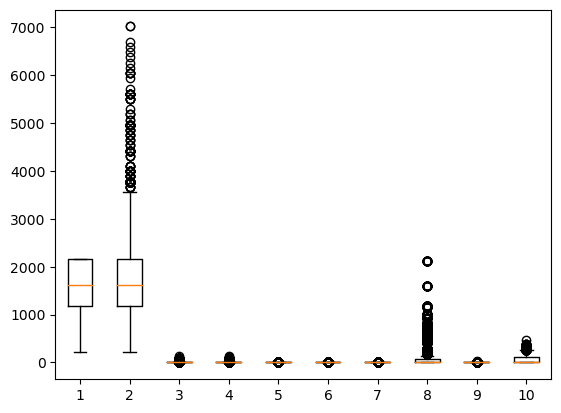

In [12]:
fig, ax = subplots()
ax.boxplot(boxdata);

scatter plots between the input variable and target

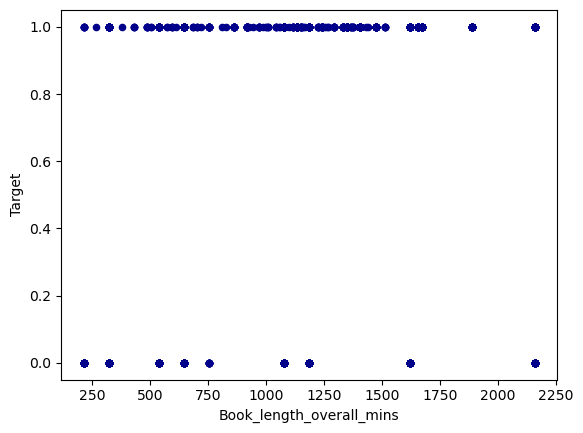

In [13]:
ax1 = dataset.plot.scatter(x='Book_length_overall_mins', y='Target', c='DarkBlue')

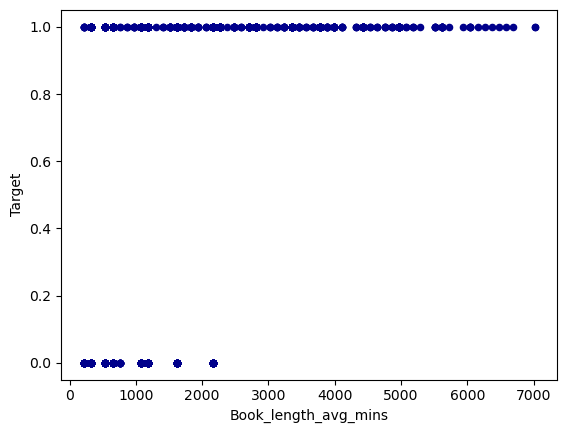

In [14]:
ax1 = dataset.plot.scatter(x='Book_length_avg_mins', y='Target', c='DarkBlue')

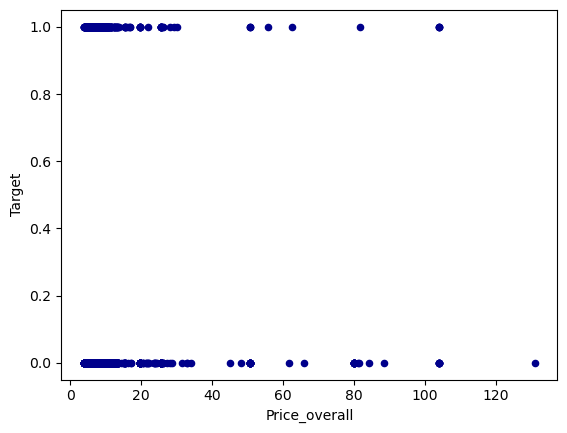

In [15]:
ax1 = dataset.plot.scatter(x='Price_overall', y='Target', c='DarkBlue')

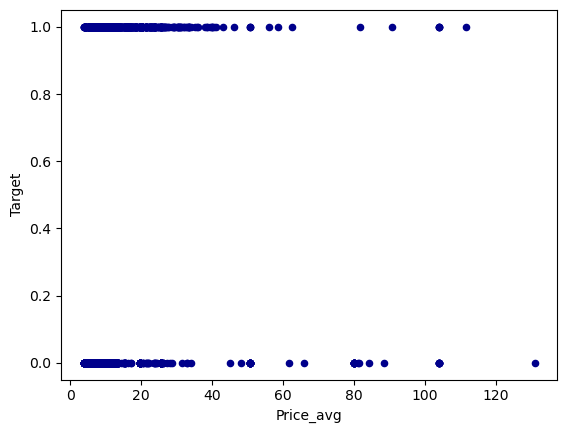

In [16]:
ax1 = dataset.plot.scatter(x='Price_avg', y='Target', c='DarkBlue')

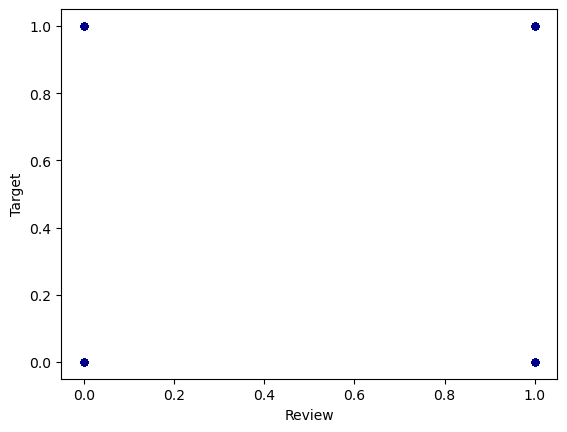

In [17]:
ax1 = dataset.plot.scatter(x='Review', y='Target', c='DarkBlue')

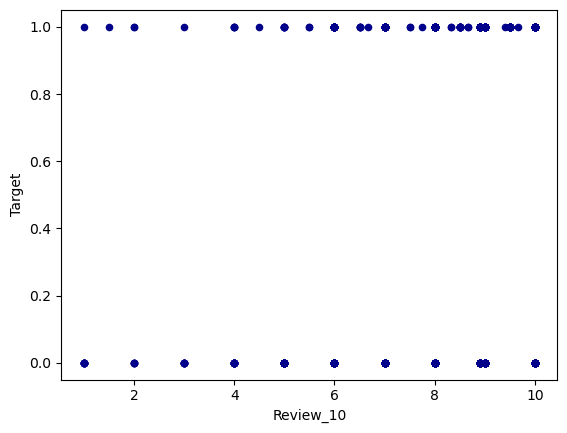

In [18]:
ax1 = dataset.plot.scatter(x='Review_10', y='Target', c='DarkBlue')

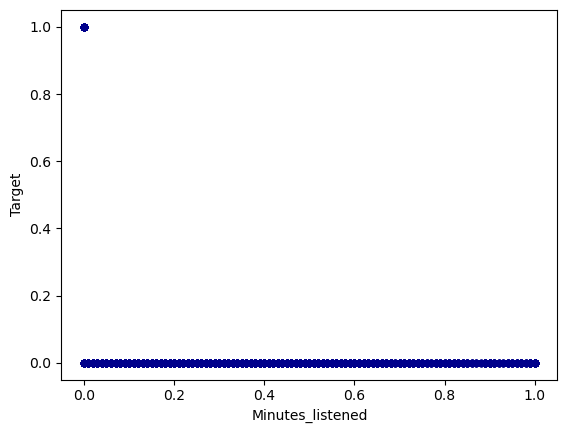

In [19]:
ax1 = dataset.plot.scatter(x='Minutes_listened', y='Target', c='DarkBlue')

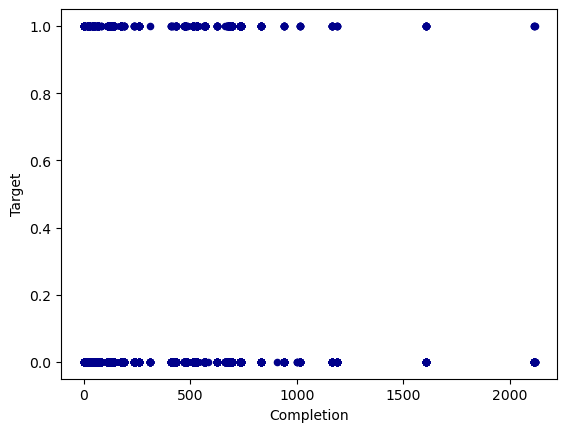

In [20]:
ax1 = dataset.plot.scatter(x='Completion', y='Target', c='DarkBlue')

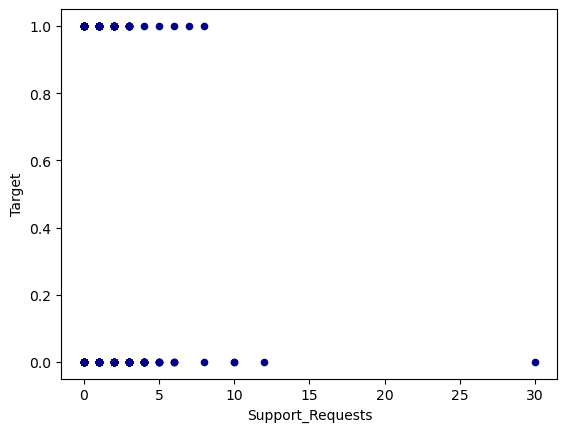

In [21]:
ax1 = dataset.plot.scatter(x='Support_Requests', y='Target', c='DarkBlue')

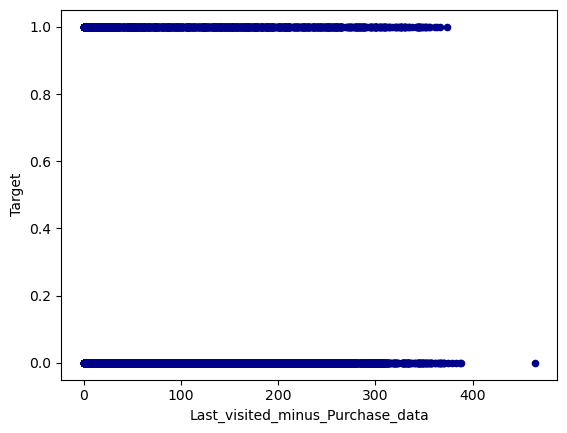

In [22]:
ax1 = dataset.plot.scatter(x='Last_visited_minus_Purchase_data', y='Target', c='DarkBlue')

## Model Building

## Linear Regression

Linear Regression model is implemented for studying the relationship between features and target variable

In [23]:
design = MS(dataset.columns.drop('Target'))
design = design.fit(dataset) #the data is fitted into the model
X1 = design.transform(dataset) #the data is transformed into the preferable format for the model
X1[:4]

,intercept,ID,Book_length_overall_mins,Book_length_avg_mins,Price_overall,Price_avg,Review,Review_10,Minutes_listened,Completion,Support_Requests,Last_visited_minus_Purchase_data
0,1.0,873,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0
1,1.0,611,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182
2,1.0,705,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334
3,1.0,391,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183


In [24]:
y=dataset['Target']
model = sm.OLS(y, X1)
results = model.fit() #model is fitted

In [25]:
summarize(results)

,coef,std err,t,P>|t|
intercept,1.331000e-01,3.800000e-02,3.515,0.000
ID,-1.343000e-07,2.710000e-07,-0.495,0.621
Book_length_overall_mins,-4.000000e-04,1.580000e-05,-23.254,0.000
Book_length_avg_mins,3.000000e-04,1.460000e-05,21.485,0.000
Price_overall,-2.600000e-03,3.000000e-03,-0.925,0.355
Price_avg,4.400000e-03,3.000000e-03,1.628,0.103
Review,1.061000e-01,8.000000e-03,12.917,0.000
Review_10,8.300000e-03,4.000000e-03,2.016,0.044
Minutes_listened,-4.446000e-01,1.300000e-02,-34.197,0.000
Completion,-1.017000e-05,9.790000e-06,-1.039,0.299


## Decision Tree

Decision Tree is implemented for predicting whether the customer is going to retain or not

In [26]:
model = MS(dataset.columns.drop(['Target','ID']), intercept=False) #decision trees don't need intercepts
D = model.fit_transform(dataset)
feature_names = list(D.columns)
X = np.asarray(D)
X

array([[2.160e+03, 2.160e+03, 1.013e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.404e+03, 2.808e+03, 6.660e+00, ..., 0.000e+00, 0.000e+00,
        1.820e+02],
       [3.240e+02, 3.240e+02, 1.013e+01, ..., 0.000e+00, 1.000e+00,
        3.340e+02],
       ...,
       [1.080e+03, 1.080e+03, 6.550e+00, ..., 0.000e+00, 0.000e+00,
        2.900e+01],
       [2.160e+03, 2.160e+03, 6.140e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.620e+03, 1.620e+03, 5.330e+00, ..., 0.000e+00, 0.000e+00,
        9.000e+01]])

In [27]:
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(X, Target01)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [28]:
accuracy_score(Target01, clf.predict(X))

0.8815677364385118

88.156% of accuracy is obtained

In [29]:
resid_dev = np.sum(log_loss(Target01, clf.predict_proba(X)))
resid_dev

0.2563419545059408

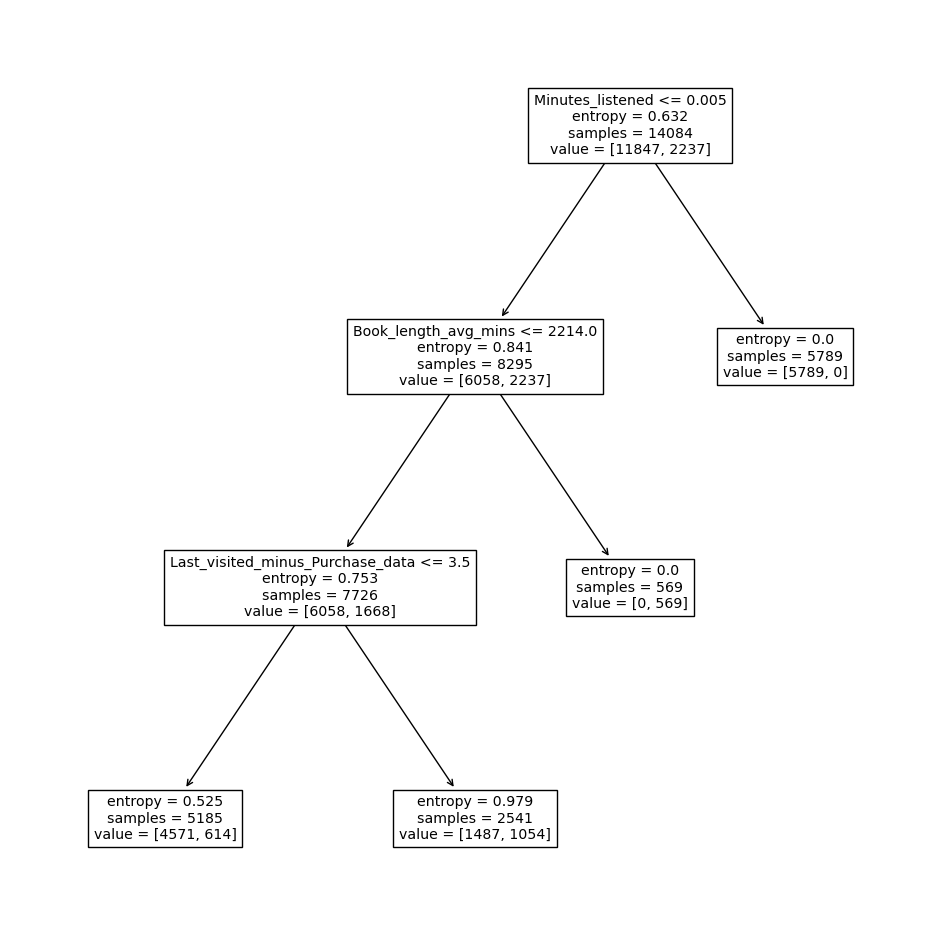

In [30]:
ax = subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

In [31]:
print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))

|--- Minutes_listened <= 0.00
|   |--- Book_length_avg_mins <= 2214.00
|   |   |--- Last_visited_minus_Purchase_data <= 3.50
|   |   |   |--- weights: [4571.00, 614.00] class: No
|   |   |--- Last_visited_minus_Purchase_data >  3.50
|   |   |   |--- weights: [1487.00, 1054.00] class: No
|   |--- Book_length_avg_mins >  2214.00
|   |   |--- weights: [0.00, 569.00] class: Yes
|--- Minutes_listened >  0.00
|   |--- weights: [5789.00, 0.00] class: No



## Applying Cross-validation 

In [32]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=200,
                              random_state=0)
results = skm.cross_validate(clf,
                             D,
                             Target01,
                             cv=validation)
results['test_score']

array([0.89])

Accuracy is 89%

## Splitting into Training and Test set

In [33]:
(X_train,
 X_test,
 Target01_train,
 Target01_test) = skm.train_test_split(X,
                                   Target01,
                                   test_size=0.5,
                                   random_state=0)

In [34]:
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train, Target01_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
accuracy_score(Target01_test, clf.predict(X_test))

0.8893780176086339

88.9% of accuracy is achieved

In [36]:
ccp_path = clf.cost_complexity_pruning_path(X_train, Target01_train)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)

In [37]:
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, Target01_train)
grid.best_score_

0.911955996131528

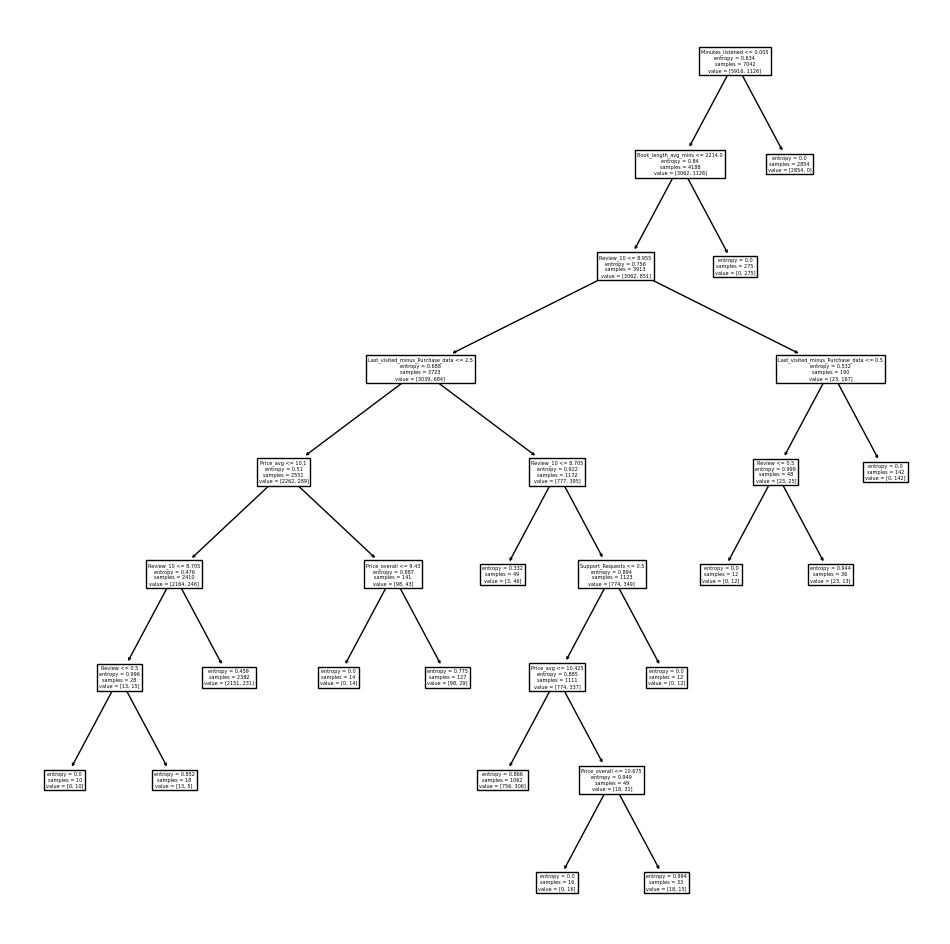

In [38]:
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax);

In [39]:
print(export_text(best_,
                  feature_names=feature_names,
                  show_weights=True))

|--- Minutes_listened <= 0.00
|   |--- Book_length_avg_mins <= 2214.00
|   |   |--- Review_10 <= 8.95
|   |   |   |--- Last_visited_minus_Purchase_data <= 2.50
|   |   |   |   |--- Price_avg <= 10.10
|   |   |   |   |   |--- Review_10 <= 8.70
|   |   |   |   |   |   |--- Review <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 10.00] class: Yes
|   |   |   |   |   |   |--- Review >  0.50
|   |   |   |   |   |   |   |--- weights: [13.00, 5.00] class: No
|   |   |   |   |   |--- Review_10 >  8.70
|   |   |   |   |   |   |--- weights: [2151.00, 231.00] class: No
|   |   |   |   |--- Price_avg >  10.10
|   |   |   |   |   |--- Price_overall <= 9.43
|   |   |   |   |   |   |--- weights: [0.00, 14.00] class: Yes
|   |   |   |   |   |--- Price_overall >  9.43
|   |   |   |   |   |   |--- weights: [98.00, 29.00] class: No
|   |   |   |--- Last_visited_minus_Purchase_data >  2.50
|   |   |   |   |--- Review_10 <= 8.70
|   |   |   |   |   |--- weights: [3.00, 46.00] class: Yes
|   |   |  

In [40]:
best_.tree_.n_leaves

15

In [41]:
print(accuracy_score(Target01_test,
                     best_.predict(X_test)))


0.9152229480261289


In [42]:
confusion = confusion_table(best_.predict(X_test),
                            Target01_test)
confusion

Truth,No,Yes
Predicted,,
No,5923,589
Yes,8,522


We achieved 91% of accuracy